In this project I will be exploring a data set with reviews from women for clothes from E-Commerce webistes. Since it is real commercial data the company names have been made anonymous. There are 10 feature variables and 23486 rows. The 10 feature variables will provide some essential insights to this data. 

Here is a brief explanation of the columns 

Clothing ID : An integer identifier for the specific garment being reviewed

Age : A positive integer indicating the reviewer’s age

Title : A short textual field providing the headline or summary of the review

Review Text : A string containing the main body or content of the reviewer’s feedback

Rating : An ordinal integer score from 1 (lowest) to 5 (highest), reflecting the customer’s overall product satisfaction

Reccommended ID : A binary indicator for whether the reviewer recommends the product (1 = recommend, 0 = not recommend)

Positive Feedback Count : A positive integer showing how many other users marked this review as helpful or positive

Division Name : A categorical field indicating the high-level product division

Department Name : A categorical attribute specifying the product’s department

Class Name : A categorical label for the product’s type

In this project I will be answering the question "How accurately can we predict whether a reviewer will recommend a clothing item using their review text, rating, and other features?" 

This will be done by first doing some Exploratory Data Analysis. This is essential because by identifying ull or missing values, outliers, or other issues with data quality early we can perform data cleansing and feature engineering in order to byuld a more accurate classifier. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
df = pd.read_csv(r"C:\Users\shery\Downloads\Womens Clothing E-Commerce Reviews.csv")
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [3]:
df.shape

(23486, 11)

<H3> Data Cleaning <H3>

Firtst we want to check if there are duplicated values and missing values in our data frame and then figure out how to deal with them.

In [4]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

We can see that the columns Title, Review Text, Divivision Name, Department Name, and Class Name have missing values. The Title and Review Text columns have the largest amount of missing values and so dropping them may not be the best option as it can skew and make our results less meaningful.

In [6]:
proportion_missing_title = df["Title"].isnull().sum() / len(df)
proportion_missing_Review_Text = df["Review Text"].isnull().sum() / len(df)
proportion_missing_title, proportion_missing_Review_Text

(0.1622243038405859, 0.035978881035510515)

Looking at the proportions of the 2 columns with the most missing data we can see that the missing proportion of Title is around 16% and the missing proportion for Review Text is around 4%. Considering the factors that we will be using Review Text and Title in our analsyis we can move forward with inputting the missing values with an empty string so that it does not interfere with the analysis. 

In [7]:
df["Review Text"].fillna("", inplace=True) 
df["Title"].fillna("", inplace=True) 

For Division Name, Departmnent Name, and Class Name. Since the missing proportion is much less than 5% we can consider dropping those missing values. 

In [8]:
df.dropna(subset=["Division Name", "Department Name", "Class Name"], inplace=True)
df.isnull().sum()


Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

<H3> Data Transformation

We want to check if we need to stadardize the numeric columns we can do this by looking at the mean, max, Q3 (75%), median, and min. Also plotting histograms can help see this as well.

In [9]:
df[["Age", "Rating", "Positive Feedback Count"]].describe()


,Age,Rating,Positive Feedback Count
count,23472.000000,23472.000000,23472.000000
mean,43.200707,4.195552,2.537151
std,12.280913,1.110188,5.703597
min,18.000000,1.000000,0.000000
25%,34.000000,4.000000,0.000000
50%,41.000000,5.000000,1.000000
75%,52.000000,5.000000,3.000000
max,99.000000,5.000000,122.000000


The Positive Feedback Count column sticks out to me. Specifically, the Q3 showing that 75% of reviews received 3 or fewer positive feedbacks while the max is 122 which is far beyond Q3. This indicates some extreme outliers. 

array([[<AxesSubplot:title={'center':'Positive Feedback Count'}>]],
      dtype=object)

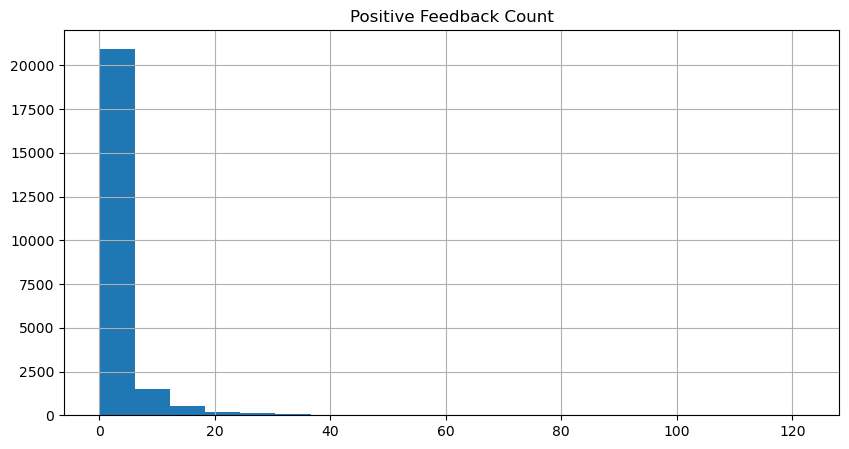

In [10]:
df[["Positive Feedback Count"]].hist(bins=20, figsize=(10, 5))


This histogram shows "Positive Feedback Count" is skewed. The Positive Feedback Count histogram shows that most of the valies are lower but there are a few very high outliers as can be seen in the max value. Since there are outliers we can not just standardize the Positive Feedback Count. Instead, we must first do a log transformation (takes care of the outliers) and then standardize (scales the values properly and makes the mean = 0 and the std dev = 1). 

In [11]:
df["Positive Feedback Log"] = np.log1p(df["Positive Feedback Count"])

scalar = StandardScaler()

df["Positive Feedback Count Standardized"] = scalar.fit_transform(df[["Positive Feedback Log"]])

df.head(4)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Positive Feedback Log,Positive Feedback Count Standardized
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000000,-0.837658
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1.609438,0.974138
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.000000,-0.837658
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.000000,-0.837658


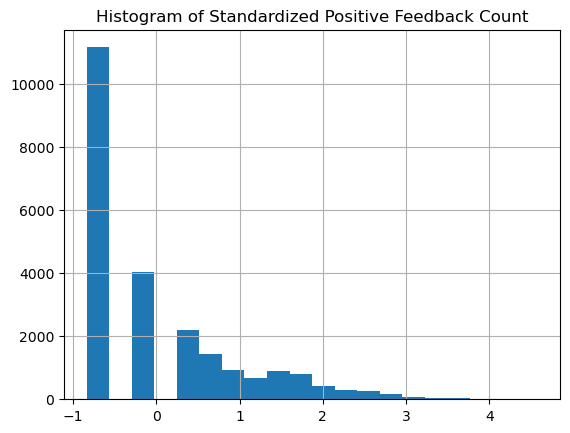

In [12]:
df["Positive Feedback Count Standardized"].hist(bins= 20)
plt.title("Histogram of Standardized Positive Feedback Count")
plt.show()

<H4>Feature Engineering 

First we will do binning for the age category. Since there is such a wide variety of ages placing them in bins will make our analysis easier. The bins that they belong to will be added as another column in our data frame.

In [13]:
df["Age Group"] = pd.cut(df["Age"], bins=[18, 30, 40, 50, 60, 100], labels=["18-30", "31-40", "41-50", "51-60", "60+"])


In [14]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Positive Feedback Log,Positive Feedback Count Standardized,Age Group
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.000000,-0.837658,31-40
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1.609438,0.974138,31-40
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.000000,-0.837658,51-60
